#Wskaźniki ekonomiczne
Poniższy dataset przedstawia wskaźniki dotyczące gospodarki krajów europejskich za rok 2022

Notebook zawiera podstawowe wnioski z datasetu typu średnia, mediana, wariancja PKB, została również obliczona wartość PKB per capita dla każdego kraju


Imports

In [ ]:
import numpy as np 
import pandas as pd
import io
import matplotlib.pyplot as plt

Load data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Economy_Indicators.csv to Economy_Indicators.csv


In [ ]:
indicators = pd.read_csv(io.BytesIO(uploaded['Economy_Indicators.csv']))
indicators_df = indicators.copy()

In [ ]:
indicators_df.head()

,Country,GDP,GDP Year-over-Year,GDP Quarter-over-Quarterr,Interest Rate,Inflation Rate,Jobless Rate,Gov. Budget,Debt/GDP,Current Account,Population
0,Euro Area,14493,4.1,0.8,1.25,10.0,6.6,-5.1,95.6,2.5,342.56
1,Germany,4223,1.7,0.1,1.25,10.0,5.5,-3.7,69.3,7.4,83.16
2,United Kingdom,3187,4.4,0.2,2.25,9.9,3.5,-6.0,95.9,-2.6,67.53
3,France,2937,4.2,0.5,1.25,5.6,7.4,-6.5,112.9,0.4,67.63
4,Italy,2100,5.0,1.1,1.25,8.9,7.8,-7.2,150.8,2.5,59.24


Basic stats

In [ ]:
print("Mean of GDP in Europe ",  indicators_df['GDP'].mean())

print("Median of GDP in Europe ", indicators_df['GDP'].median())

print("Variance of GDP in Europe ", indicators_df['GDP'].var())

Mean of GDP in Europe  930.6666666666666
Median of GDP in Europe  233.0
Variance of GDP in Europe  5482983.349593497


List comprehension as a mask

In [ ]:
[(indicators_df['Country'][x], indicators_df['GDP'][x]) for x in range(len(indicators_df)) if indicators_df['GDP'][x] > 500]

[('Euro Area', 14493),
 ('Germany', 4223),
 ('United Kingdom', 3187),
 ('France', 2937),
 ('Italy', 2100),
 ('Russia', 1776),
 ('Spain', 1425),
 ('Netherlands', 1018),
 ('Turkey', 815),
 ('Switzerland', 813),
 ('Poland', 674),
 ('Sweden', 627),
 ('Belgium', 600)]

Compute GDP per Capita

In [ ]:
indicators_df['GDP per Capita'] = [indicators_df['GDP'][x] / indicators_df['Population'][x] for x in range(len(indicators_df))]

indicators_df.head()

,Country,GDP,GDP Year-over-Year,GDP Quarter-over-Quarterr,Interest Rate,Inflation Rate,Jobless Rate,Gov. Budget,Debt/GDP,Current Account,Population,GDP per Capita
0,Euro Area,14493,4.1,0.8,1.25,10.0,6.6,-5.1,95.6,2.5,342.56,42.307917
1,Germany,4223,1.7,0.1,1.25,10.0,5.5,-3.7,69.3,7.4,83.16,50.781626
2,United Kingdom,3187,4.4,0.2,2.25,9.9,3.5,-6.0,95.9,-2.6,67.53,47.193840
3,France,2937,4.2,0.5,1.25,5.6,7.4,-6.5,112.9,0.4,67.63,43.427473
4,Italy,2100,5.0,1.1,1.25,8.9,7.8,-7.2,150.8,2.5,59.24,35.449021


Group By

In [ ]:
print(indicators_df.groupby(by='Country').mean())

                            GDP  GDP Year-over-Year  Inflation Rate  \
Country                                                               
Albania                    18.0                2.23            8.10   
Austria                   477.0                6.00           10.50   
Belarus                    68.0               -0.40           17.40   
Belgium                   600.0                3.30           11.27   
Bosnia and Herzegovina     23.0                5.90           16.80   
Bulgaria                   80.0                3.96           17.70   
Croatia                    68.0                7.70           12.30   
Cyprus                     28.0                6.10            8.74   
Czech Republic            282.0                3.70           18.00   
Denmark                   397.0                3.90           10.00   
Estonia                    36.0                0.60           23.70   
Euro Area               14493.0                4.10           10.00   
Finlan

Plot

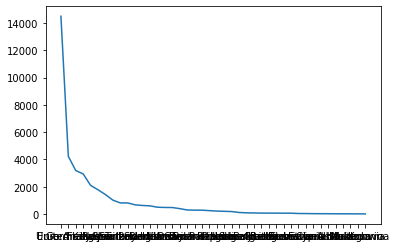

In [ ]:
plt.plot(indicators_df['Country'], indicators_df['GDP'])

Save file

In [ ]:
with open('new.csv', 'w') as file:
  for i in range(len(indicators_df)):
    file.write(indicators_df[i], '\n')